In [1]:
import pickle
import numpy as np
import pandas as pd
from os import path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
import pickle

In [2]:
plot_input = {
    "w/o Cash-out":
        {"2015-2019":{
            "DIR": "./output/306",
            "prefix": "BRZ_TW_NASDAQ-Selected_Trans-withleakage+RSI-_detailed-ModelNo-200000-"
        },
        "2001-2004":{
            "DIR": "./output/307",
            "prefix": "BRZ_TW_NASDAQ-Selected_Trans-withleakage+RSI-_detailed-ModelNo-200000-"
        },
        "2007-2010":{
            "DIR": "./output/308",
            "prefix": "BRZ_TW_NASDAQ-Selected_Trans-withleakage+RSI-_detailed-ModelNo-200000-"
        },
    },
    "20% Cash-out":{
        "2015-2019":{
            "DIR": "./output/410",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2015-01-01"),
            "end_date": pd.to_datetime("2019-12-31"),
        },
        "2001-2004":{
            "DIR": "./output/411",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2001-01-01"),
            "end_date": pd.to_datetime("2004-12-31"),
        },
        "2007-2010":{
            "DIR": "./output/412",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2007-01-01"),
            "end_date": pd.to_datetime("2010-12-31"),
        },
    },
    "15% Cash-out":{
        "2015-2019":{
            "DIR": "./output/420",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2015-01-01"),
            "end_date": pd.to_datetime("2019-12-31"),
        },
        "2001-2004":{
            "DIR": "./output/421",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2001-01-01"),
            "end_date": pd.to_datetime("2004-12-31"),
        },
        "2007-2010":{
            "DIR": "./output/422",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2007-01-01"),
            "end_date": pd.to_datetime("2010-12-31"),
        },
    },
    "10% Cash-out":{
        "2015-2019":{
            "DIR": "./output/430",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2015-01-01"),
            "end_date": pd.to_datetime("2019-12-31"),
        },
        "2001-2004":{
            "DIR": "./output/431",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2001-01-01"),
            "end_date": pd.to_datetime("2004-12-31"),
        },
        "2007-2010":{
            "DIR": "./output/432",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2007-01-01"),
            "end_date": pd.to_datetime("2010-12-31"),
        },
    },
}

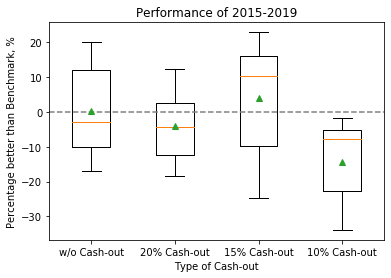

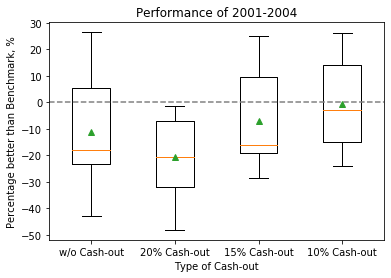

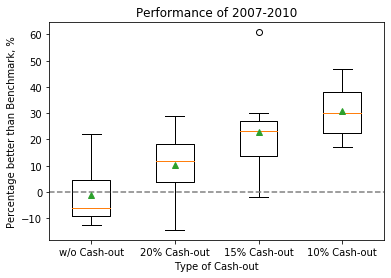

In [48]:
types = ["w/o Cash-out", "20% Cash-out", "15% Cash-out", "10% Cash-out"]
periods = ["2015-2019", "2001-2004", "2007-2010"]
# period = periods[0]
for period in periods:
    period_result = []
    for tmp_type in types:
        DIR = plot_input[tmp_type][period]["DIR"]
        batch_result = []
        for i in range(10):
            record = pickle.load(open(path.join(DIR,plot_input[tmp_type][period]["prefix"]+str(i)+".out"), "rb"))
            df = pd.DataFrame(record)
            result = dict(df['actual_profit'].describe())
            result['act_perc'] = df['actual_profit'].values[-1]/df['buyNhold_balance'].values[-1]
            batch_result.append(result)
        batch_result = pd.DataFrame(batch_result)
        period_result.append(np.array(batch_result['act_perc']))
    plt.boxplot([tmp*100 for tmp in period_result], labels=types, showmeans=True)
    plt.axhline(y=0, color = "grey", linestyle='--')
    plt.ylabel("Percentage better than Benchmark, %")
    plt.xlabel("Type of Cash-out")
    plt.title("Performance of "+period)
    plt.show()

In [41]:
period_result[0].mean()

0.002454533091960506

In [50]:
period_result[3].mean()

0.30684474213005125

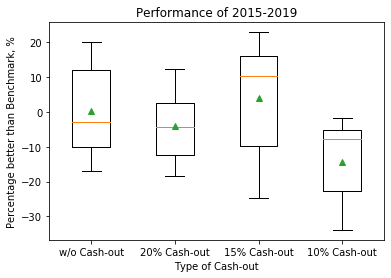

In [46]:
plt.boxplot([tmp*100 for tmp in period_result], labels=types, showmeans=True)
plt.ylabel("Percentage better than Benchmark, %")
plt.xlabel("Type of Cash-out")
plt.title("Performance of "+period)
plt.show()

In [32]:
period_result[0]

array([-0.09134549,  0.14429708,  0.16807448, -0.09221279, -0.1078589 ,
        0.20112388,  0.03080204,  0.04407321, -0.16897991, -0.10342826])

In [6]:
price_dir = "./data"
file_names = ["^BVSP_new", "^TWII_new", "^IXIC_new"]
from CSVUtils import csv2df
df_list = []
for name in file_names:
    df = csv2df(price_dir, name+".csv", source="done")
    df = df[(df['Date']>=startDate)&(df['Date']<=endDate)].reset_index(drop = True)
    init_value = 100000
    start_price = df['Price'][0]
    inv_number = init_value/start_price
    df['BuyNHold'] = df['Price']*inv_number
    df_list.append(df)
buyNHold_totalValue = df_list[0]['BuyNHold'] +df_list[1]['BuyNHold']+df_list[2]['BuyNHold']

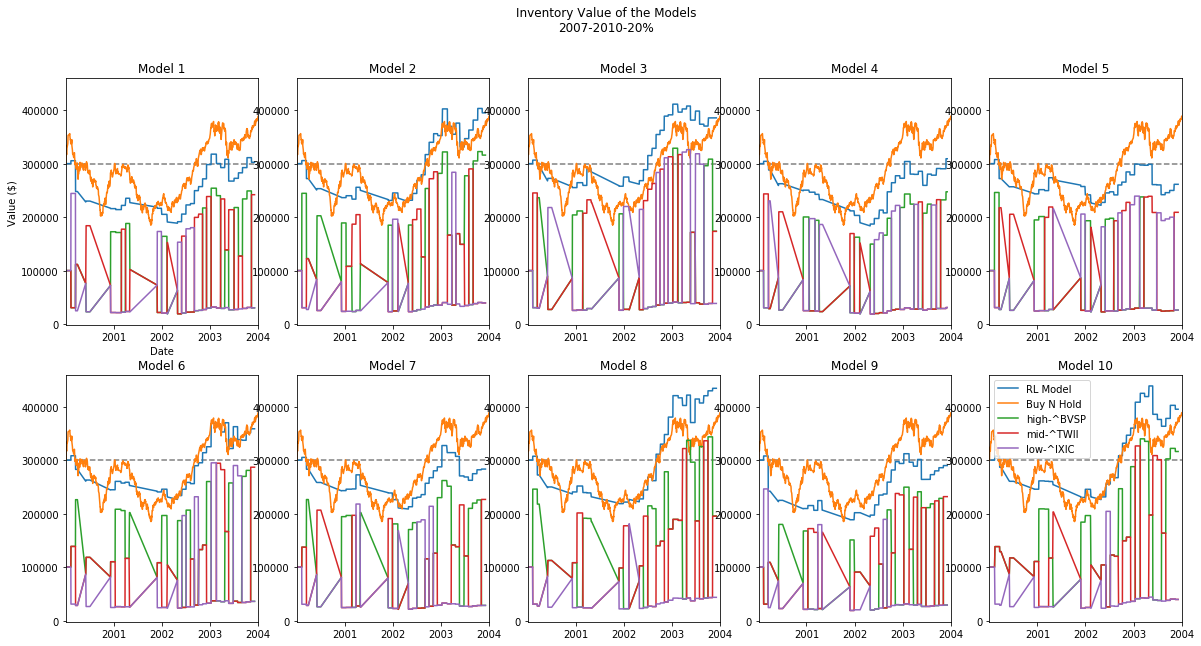

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
import pickle

data = plot_input["10% Cash-out"]["2001-2004"]
output_dir = data["DIR"]
axx = plt.figure(figsize=(20,10))
plt.suptitle("Inventory Value of the Models\n2007-2010-20%")
plt.rcParams['figure.facecolor'] = 'white'
labels = ["high-^BVSP", "mid-^TWII", "low-^IXIC"]
for i in range(10):
    try:
        if i == 0:
            ax0 = plt.subplot(2, 5, 1)
            plt.xlabel("Date")
            plt.ylabel("Value ($)")
            ax = ax0
        else:
            ax = plt.subplot(2, 5, i+1, sharex=ax0, sharey = ax0)
        
        startDate = data["start_date"]
        endDate = data["end_date"]
        record = pickle.load(open(path.join(output_dir,data["prefix"]+str(i)+".out"), "rb"))
        df = pd.DataFrame(record)
        plt.axhline(y=300000, color = "grey", linestyle='--')
        plt.xlim((startDate,endDate))
        ax.set_xticks(pd.date_range(start=startDate, end=endDate, freq='Y'))

        plt.plot(df['date'], df['net_worth'], label="RL Model")
        plt.plot(df_list[0]['Date'], buyNHold_totalValue, label="Buy N Hold")
        
        for j in range(3):
            plt.plot(df['date'], [tmp[j] for tmp in df['inventory']], label=labels[j])
#         plt.bar(df['Date'], np.insert(np.diff(df['Net Value']), 0, 0)/nominal_plot_data['Net Value'][0]*100, 
#                label = nominal_labels[i]+"_Delta Net Value", width = 5)
#             first_price = df['actual_price'][0][j]
#             plt.plot(df['date'], [tmp[j]/first_price*300000 for tmp in df['actual_price']])
        plt.title("Model "+str(i+1))
    except Exception as e:
        print(e)
plt.legend()

In [12]:
a=pd.Timestamp('2007-01-01')
b=pd.Timestamp('2010-12-31')



DatetimeIndex(['2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31'], dtype='datetime64[ns]', freq='A-DEC')